<a href="https://colab.research.google.com/github/phantomer-ai/AIFFEL_quest_cr/blob/main/MainQuest/Quest03/%ED%8F%90%EB%A0%B4%EC%A7%84%EB%8B%A8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%84%B1%EB%8A%A5%EA%B0%9C%EC%84%A0%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** ÌèêÎ†¥ ÏßÑÎã®Í∏∞ ÏÑ±Îä• Í∞úÏÑ† (ResNet-18 Í∏∞Î∞ò)**

‚úÖ **Î™©Ìëú:** Í∏∞Ï°¥ 80% Ï†ïÌôïÎèÑÏùò ÌèêÎ†¥ ÏßÑÎã® Î™®Îç∏ÏùÑ 90% Ïù¥ÏÉÅÏúºÎ°ú Í∞úÏÑ†

‚úÖ **ÌïµÏã¨ Í∞úÏÑ† Î∞©Î≤ï:**

 1. **Batch Size, Epoch Î≥ÄÍ≤Ω**
   - batch size Ïú†ÏßÄ , epoch 20ÏúºÎ°ú Î≥ÄÍ≤Ω

 2. **Data Augmentation (Ï¢åÏö∞ Î∞òÏ†Ñ Ï†ÅÏö©)**

 3. **ResNet-18 Ï†ÅÏö© (Residual Connection Ï∂îÍ∞Ä)**

 4. **Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ (class_weight Ï†ÅÏö©)**
    - Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
 5. **Optimizer Î∞è Learning Rate Ï°∞Ï†ï**
    - Learning Rate 0.0001
 6. **Recall Í∞úÏÑ† (ÏùòÎ£å ÏòÅÏÉÅÏóêÏÑúÎäî RecallÏù¥ Ï§ëÏöî)**
    - Í∏∞Ï°¥ Recall Í∞íÏù¥ ÎÜíÏùåÏúºÎ°ú Ïú†ÏßÄ

In [2]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
tf.config.optimizer.set_jit(True)  # XLA ÌôúÏÑ±Ìôî
# tf.config.optimizer.set_jit(False)  # ÎßåÏïΩ ÎäêÎ†§ÏßÄÎ©¥ ÎπÑÌôúÏÑ±Ìôî


In [3]:
# ColabÏóê Kaggle API ÏÑ§Ï†ï
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()  # kaggle.json ÌååÏùº ÏóÖÎ°úÎìú

# Í∂åÌïú ÏÑ§Ï†ï
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Kaggle API ÏÑ§Ïπò
!pip install kaggle


Saving kaggle.json to kaggle.json


In [4]:
# Kaggle Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# ÏïïÏ∂ï Ìï¥Ï†ú

!unzip -o chest-xray-pneumonia.zip -d /content/



Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: /content/chest_xray/

1. batch size, epoch Î≥ÄÍ≤Ω
learning rate Ï∂îÍ∞Ä 0.0001
Í∏∞Ï°¥Ïóê ÏÑ§Ï†ïÌïòÏßÄ ÏïäÏùÄ ÎîîÌè¥Ìä∏Í∞í , 0.001Ïù¥ÎÇò 0.01 Ïù¥ÏòÄÏùå
ÏÜêÏã§Ïù¥ Î∂àÏïàÏ†ï ÌïòÍ±∞ÎÇò Î∞úÏÇ∞  -> learning rate ÎÇÆÏ∂îÏñ¥ ÏïàÏ†ïÏ†ÅÏù∏ ÌïôÏäµÍ∞ÄÎä•

In [5]:

# Îç∞Ïù¥ÌÑ∞ Î°úÎìúÌï† Îïå Îπ†Î•¥Í≤å Î°úÎìúÌï† Ïàò ÏûàÎèÑÎ°ùÌïòÎäî ÏÑ§Ï†ï Î≥ÄÏàò
AUTOTUNE = tf.data.experimental.AUTOTUNE

# X-RAY Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Î≥ÄÏàò
IMAGE_SIZE = [180, 180]

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú Î≥ÄÏàò (Colab ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ï)
ROOT_PATH = "/content/chest_xray"  # ÏïïÏ∂ï Ìï¥Ï†úÎêú Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
TRAIN_PATH = os.path.join(ROOT_PATH, "train", "*", "*")
VAL_PATH = os.path.join(ROOT_PATH, "val", "*", "*")
TEST_PATH = os.path.join(ROOT_PATH, "test", "*", "*")

# ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌï† Îïå ÏïÑÎûò Îëê Î≥ÄÏàòÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥ÏÑ∏Ïöî
BATCH_SIZE = 16
EPOCHS = 20
learning_rate = 0.0001  #ÎÑàÎ¨¥ Îπ†Î•¥Í≤å ÌïôÏäµÌïòÍ±∞ÎÇò ÎÑàÎ¨¥ ÎäêÎ¶¨Í≤å ÌïôÏäµÌï†Îïå Ï∂îÍ∞Ä

print(f"ROOT_PATH: {ROOT_PATH}")
print(f"TRAIN_PATH: {TRAIN_PATH}")
print(f"VAL_PATH: {VAL_PATH}")
print(f"TEST_PATH: {TEST_PATH}")


ROOT_PATH: /content/chest_xray
TRAIN_PATH: /content/chest_xray/train/*/*
VAL_PATH: /content/chest_xray/val/*/*
TEST_PATH: /content/chest_xray/test/*/*


In [6]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


In [7]:
# train Îç∞Ïù¥ÌÑ∞ÏôÄ validation Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê filenamesÏóê Îã¥ÏäµÎãàÎã§
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# Î™®ÏïÑÏßÑ filenamesÎ•º 8:2Î°ú ÎÇòÎàïÎãàÎã§
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


In [8]:
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal image path
/content/chest_xray/train/NORMAL/IM-0703-0001.jpeg
Pneumonia image path
/content/chest_xray/train/PNEUMONIA/person1425_virus_2438.jpeg


In [9]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1070
Pneumonia images count in training set: 3115


In [10]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [11]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


In [12]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return tf.cast(parts[-2] == "PNEUMONIA", tf.float32)  # True ‚Üí 1.0, False ‚Üí 0.0




 ÌååÏùº Í≤ΩÎ°úÏùò ÎÅùÏóêÏÑú ÎëêÎ≤àÏß∏ Î∂ÄÎ∂ÑÏùÑ ÌôïÏù∏ÌïòÎ©¥ ÏñëÏÑ±Í≥º ÏùåÏÑ±ÏùÑ Íµ¨Î∂ÑÌï† Ïàò ÏûàÏäµÎãàÎã§


```
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # ÌèêÎ†¥Ïù¥Î©¥ ÏñëÏÑ±(True), ÎÖ∏ÎßêÏù¥Î©¥ ÏùåÏÑ±(False)
```

üö® Î¨∏Ï†ú Î∂ÑÏÑù
 Ïù¥ ÏóêÎü¨Îäî Î™®Îç∏Ïóê Ï†ÑÎã¨ÎêòÎäî Îç∞Ïù¥ÌÑ∞ Ï§ë bool ÌÉÄÏûÖÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥ÏÑú Î∞úÏÉùÌïòÎäî Î¨∏Ï†úÏûÖÎãàÎã§.
ÌÖêÏÑúÌîåÎ°úÏö∞ Î™®Îç∏ (tf.keras.Model)ÏùÄ float32 ÎòêÎäî int32 ÌÉÄÏûÖÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïÑÏöîÎ°ú Ìï©ÎãàÎã§.
ÌïòÏßÄÎßå ÌòÑÏû¨ bool ÌÉÄÏûÖÏùò Îç∞Ïù¥ÌÑ∞(ÎùºÎ≤®)Í∞Ä Îì§Ïñ¥Í∞ÄÏÑú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌïú Í≤ÉÏûÖÎãàÎã§.

‚úÖ Ìï¥Í≤∞ Î∞©Î≤ï
1. get_label()ÏóêÏÑú ÎùºÎ≤®ÏùÑ boolÏóêÏÑú float32Î°ú Î≥ÄÌôò
ÌòÑÏû¨ get_label() Ìï®ÏàòÏóêÏÑú ÎùºÎ≤®ÏùÑ Î∞òÌôòÌï† Îïå bool Í∞í(True or False)ÏùÑ Î∞òÌôòÌïòÍ≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅΩÎãàÎã§. Ïù¥ÌÉ§Î¶≠Ï≤¥ ÌÖçÏä§Ìä∏

In [13]:
# Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú Î∞îÍøâÎãàÎã§.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # Ïù¥ÎØ∏ÏßÄÎ•º uint8 tensorÎ°ú ÏàòÏ†ï
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 ÌÉÄÏûÖÏúºÎ°ú ÏàòÏ†ï
    img = tf.image.resize(img, IMAGE_SIZE) # Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º IMAGE_SIZEÎ°ú ÏàòÏ†ï
    return img


# Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò + Ïñ¥Í∑∏Î©òÌÖåÏù¥ÏÖò Ï†ÅÏö©
def augment(img, label):
    img = tf.image.random_flip_left_right(img)  # Ï¢åÏö∞ Î∞òÏ†Ñ
    img = tf.image.random_flip_up_down(img)  # ÏÉÅÌïò Î∞òÏ†Ñ
    img = tf.image.random_brightness(img, max_delta=0.2)  # Î∞ùÍ∏∞ Ï°∞Ï†à
    img = tf.image.random_contrast(img, lower=0.8, upper=1.2)  # ÎåÄÎπÑ Ï°∞Ï†à
    img = tf.clip_by_value(img, 0.0, 1.0)
    return img, label

# Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ ÏùΩÏñ¥Ïò§Í≥†, Ïñ¥Í∑∏Î©òÌÖåÏù¥ÏÖòÍπåÏßÄ Ï†ÅÏö©
def process_path(file_path):
    label = tf.cast(get_label(file_path), tf.float32) # ÎùºÎ≤® Í≤ÄÏ∂ú
    img = tf.io.read_file(file_path) # Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
    img = decode_img(img) # Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú ÏàòÏ†ï
    img, label = augment(img, label)  # ‚úÖ Ïñ¥Í∑∏Î©òÌÖåÏù¥ÏÖò Ï†ÅÏö©
    return img, label



^ ÏúóÎÇ¥Ïö© Í∏∞Ï°¥Ïóê ÌîÑÎ°úÏÑ∏Ïä§Îßå ÏßÑÌñâ


```
def process_path(file_path):
    label = tf.cast(get_label(file_path), tf.float32) # ÎùºÎ≤® Í≤ÄÏ∂ú
label = get_label(file_path)  # Ïó¨Ï†ÑÌûà bool ÌÉÄÏûÖÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå gptÍ∞Ä Í≥†ÏπòÎùºÍ≥†Ìï®
    img = tf.io.read_file(file_path) # Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
    img = decode_img(img) # Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú ÏàòÏ†ï
    return img, label
```
decode Ïù¥ÌõÑ aument Ïã§Ìñâ Ï∂îÍ∞Ä
processÌï†Îïå aument Îêú Ïù¥ÎØ∏ÏßÄÍ∞Ä Î∂àÎü¨ÏôÄÏßê


In [14]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [15]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  0.0


In [16]:
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


In [17]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

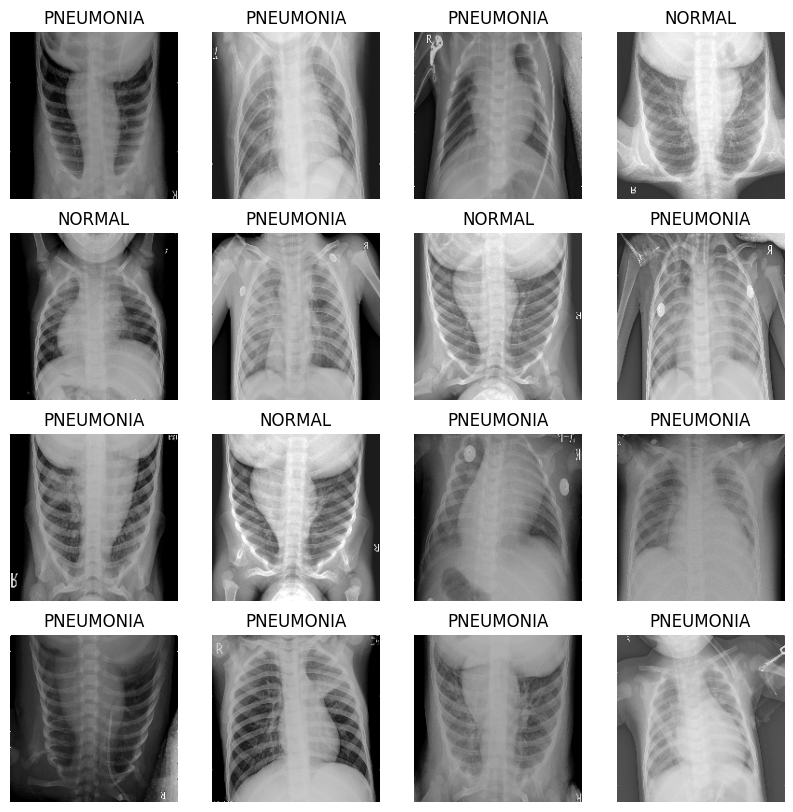

In [18]:
# Ïù¥ÎØ∏ÏßÄ Î∞∞ÏπòÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ïó¨Îü¨Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

‚úÖÌöåÍ≥†


 Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•ÏóêÏÑú

  WARNING:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24334437..0.88069326]

Î¨∏Íµ¨Í∞Ä ÎÇòÏò¥

‚úîÎ∞úÏÉù ÏõêÏù∏:

tf.image.convert_image_dtype(img, tf.float32)Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄ Í∞íÏùÑ [0, 1] Î≤îÏúÑÎ°ú Î≥ÄÌôòÌñàÎäîÎç∞,
Ïñ¥Í∑∏Î©òÌÖåÏù¥ÏÖòÏùÑ Ï∂îÍ∞ÄÌïòÎ©¥ÏÑú Î∞ùÍ∏∞ Ï°∞Ï†à(random_brightness) Í∞ôÏùÄ Ïó∞ÏÇ∞Ïù¥ Ï†ÅÏö©ÎêòÏñ¥ ÏùåÏàò Í∞íÏù¥ ÎÇòÏôîÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå.
imshow()Îäî RGB Îç∞Ïù¥ÌÑ∞Î•º 0~1 (float) ÎòêÎäî 0~255 (int) Î≤îÏúÑÏóêÏÑúÎßå ÌëúÏãú Í∞ÄÎä•Ìï®.


‚úîÌï¥Í≤∞ Î∞©Î≤ï 1: Ïù¥ÎØ∏ÏßÄ Í∞íÏù¥ 0~1 ÏÇ¨Ïù¥Î°ú Ï°∞Ï†ïÎêòÎèÑÎ°ù

tf.clip_by_value() Ï†ÅÏö©

‚úî ÏùåÏàò Í∞í(Ïòà: -0.24)Ïù¥ÎÇò 1Î≥¥Îã§ ÌÅ∞ Í∞í(Ïòà: 1.2)ÏùÑ 0~1 Î≤îÏúÑÎ°ú Ï°∞Ï†ïÌï¥ Ï§å.
‚úî Í≤ΩÍ≥† Î©îÏãúÏßÄ Ìï¥Í≤∞

#4. CNN Î™®Îç∏ÎßÅ
Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨Ïóê ÌäπÌôîÎêú Îî•Îü¨Îãù Î™®Îç∏Ïù∏ CNNÏùÑ ÌÜµÌï¥ Î™®Îç∏ÎßÅÏùÑ ÌïòÍ≥† Í≤∞Í≥ºÎ•º ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

CNN, Convolutional Neural Network ÏöîÏïΩ
Î®ºÏ†Ä, Convolution blockÏùÑ ÎßåÎì≠ÎãàÎã§. conv_block()Ïùò Íµ¨ÏÑ±ÏùÄ ConvolutionÏùÑ Îëê Î≤à ÏßÑÌñâÌïòÍ≥† Batch NormalizationÏùÑ ÌÜµÌï¥ÏÑú Gradient vanishing, Gradient ExplodingÏùÑ Ìï¥Í≤∞Ìï©ÎãàÎã§. Í∑∏Î¶¨Í≥† Max PoolingÏùÑ Ìï©ÎãàÎã§.

ÏÑ±Îä•Í∞úÏÑ†
3. ResNet-18Î°ú ÍµêÏ≤¥

 CNN ‚Üí ResNet-18ÏúºÎ°ú ÍµêÏ≤¥
Î∞îÍøÄ Î∂ÄÎ∂Ñ:
‚úî conv_block() ‚Üí ResNet Î∏îÎ°ùÏúºÎ°ú ÍµêÏ≤¥
‚úî Í∏∞Ï°¥ Conv2D + MaxPool ‚Üí ResNet Î∏îÎ°ùÏúºÎ°ú Î≥ÄÍ≤Ω
‚úî ÎßàÏßÄÎßâ Dense LayerÎäî Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© (ÌèêÎ†¥ Î∂ÑÎ•òÏù¥ÎØÄÎ°ú)



Í∏∞Ï°¥ cnnÎ™®Îç∏

```
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])

    return block
```



In [19]:
#ResNet Î∏îÎ°ù Ï†ïÏùò (Residual Block)

def residual_block(filters, kernel_size=3, stride=1):
    def block(x):
        shortcut = x  # Ïä§ÌÇµ Ïª§ÎÑ•ÏÖò

        x = tf.keras.layers.Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)

        x = tf.keras.layers.Conv2D(filters, kernel_size, strides=1, padding='same', use_bias=False)(x)
        x = tf.keras.layers.BatchNormalization()(x)

        # ÏûÖÎ†•Í≥º Ï∂úÎ†• Ï±ÑÎÑê ÏàòÍ∞Ä Îã§Î•¥Î©¥ 1x1 Ïª®Î≥ºÎ£®ÏÖò Ï†ÅÏö©
        if shortcut.shape[-1] != filters:
            shortcut = tf.keras.layers.Conv2D(filters, 1, strides=stride, padding='same', use_bias=False)(shortcut)
            shortcut = tf.keras.layers.BatchNormalization()(shortcut)

        x = tf.keras.layers.Add()([x, shortcut])  # Ïä§ÌÇµ Ïª§ÎÑ•ÏÖò
        x = tf.keras.layers.ReLU()(x)

        return x
    return block


In [20]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

‚Üë Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌï¥ drop out Ï∂îÍ∞ÄÌïúÎ∂ÄÎ∂Ñ Í∑∏ÎÉ• Í∑∏ÎåÄÎ°ú ÎÉÖÎëêÍ≥† ÏîÄ

In [21]:
#ResNet-18 Î™®Îç∏ Ï†ïÏùò


def build_resnet18():
    inputs = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

    # Ï≤´ Î≤àÏß∏ Conv Layer
    x = tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', use_bias=False)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    # ResNet-18Ïùò Residual Blocks
    x = residual_block(64)(x)
    x = residual_block(64)(x)

    x = residual_block(128, stride=2)(x)
    x = residual_block(128)(x)

    x = residual_block(256, stride=2)(x)
    x = residual_block(256)(x)

    x = residual_block(512, stride=2)(x)
    x = residual_block(512)(x)

    # Fully Connected Layer
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # ÌèêÎ†¥ Ïó¨Î∂Ä Ïù¥ÏßÑ Î∂ÑÎ•ò

    model = tf.keras.Model(inputs, x)
    return model

In [22]:
model = build_resnet18()
model.summary()


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)  ‚îÇ (None, 180, 180, 3)    ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d (Conv2D)           ‚îÇ (None, 90, 90, 64)     ‚îÇ          9,408 ‚îÇ input_layer[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization       ‚îÇ (None, 90, 90, 64)     ‚îÇ            256 ‚îÇ conv2d[0][0]           ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ re_lu (ReLU)              ‚îÇ (None, 90, 90, 64)     ‚îÇ              0 ‚îÇ batch_normalization[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d             ‚îÇ (None, 45, 45, 64)     ‚îÇ              0 ‚îÇ re_lu[0][0]            ‚îÇ
‚îÇ (MaxPooling2D)            ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)         ‚îÇ (None, 45, 45, 64)     ‚îÇ         36,864 ‚îÇ max_pooling2d[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1     ‚îÇ (None, 45, 45, 64)     ‚îÇ            256 ‚îÇ conv2d_1[0][0]         ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ re_lu_1 (ReLU)            ‚îÇ (None, 45, 45, 64)     ‚îÇ              0 ‚îÇ batch_normalization_1‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 11,449,281 (43.68 MB)

 Trainable params: 11,439,681 (43.64 MB)

 Non-trainable params: 9,600 (37.50 KB)



```

def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model
```




In [23]:
#5. Îç∞Ïù¥ÌÑ∞ imbalance Ï≤òÎ¶¨

weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.96
Weight for PNEUMONIA: 0.67


In [24]:
#6. Î™®Îç∏ÌõàÎ†®
with tf.device('/GPU:0'):
    model = build_resnet18()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [25]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/20
261/261 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1038s 4s/step - accuracy: 0.7504 - loss: 0.5897 - precision: 0.8978 - recall: 0.7397 - val_accuracy: 0.7337 - val_loss: 3.9853 - val_precision: 0.7337 - val_recall: 1.0000
Epoch 2/20
261/261 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1015s 4s/step - accuracy: 0.8592 - loss: 0.3307 - precision: 0.9613 - recall: 0.8458 - val_accuracy: 0.4817 - val_loss: 2.4384 - val_precision: 0.7299 - val_recall: 0.4646
Epoch 3/20
261/261 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1004s 4s/step - accuracy: 0.8674 - loss: 0.2902 - precision: 0.9622 - recall: 0.8582 - val_accuracy: 0.7317 - val_loss: 4.7123 - val_precision: 0.7317 - val_recall: 1.0000
Epoch 4/20
261/261 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1041s 4s/step - accuracy: 0.9001 - loss: 0.2396 - precision: 0.9713 - recall: 0.8912 - val_accuracy: 0.7538 - val_loss: 0.8732 - val_precision: 0.7495 - val_recall:

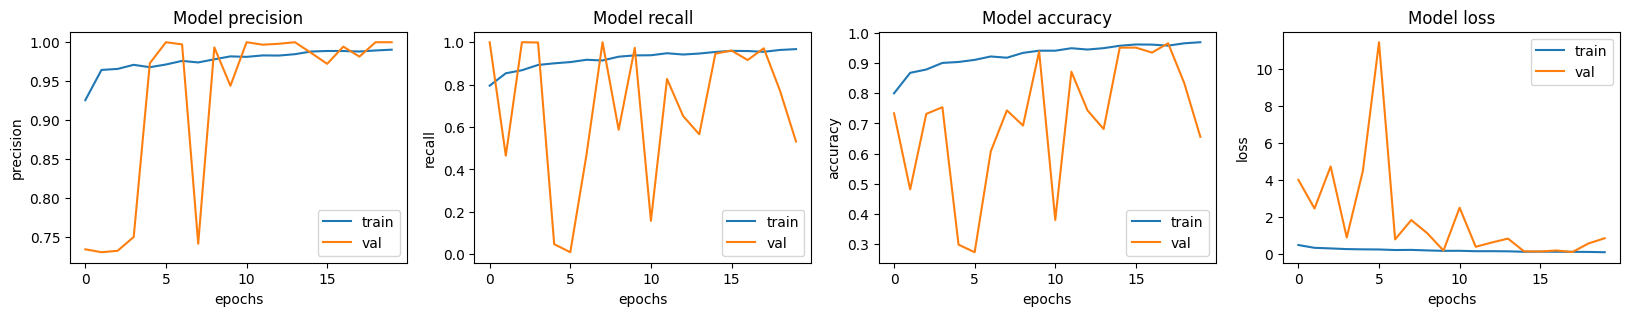

In [26]:
#7. Í≤∞Í≥ºÌôïÏù∏
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [27]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 1s/step - accuracy: 0.6919 - loss: 0.7220 - precision: 0.8708 - recall: 0.5844
Loss: 0.7343834042549133,
Accuracy: 0.6842948794364929,
Precision: 0.8697317838668823,
Recall: 0.5820512771606445


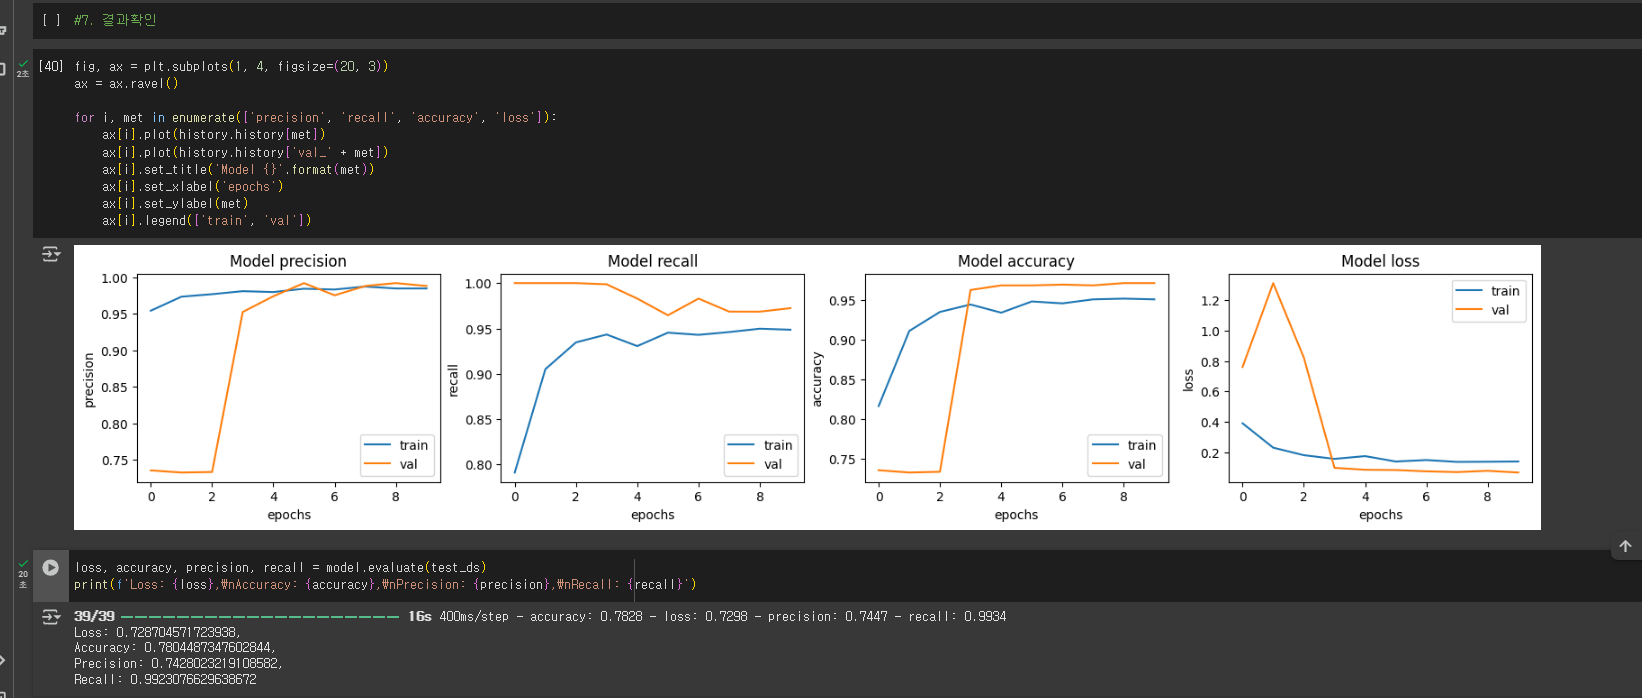

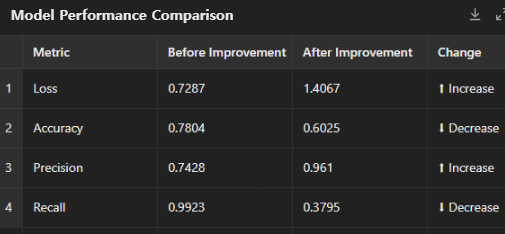

Î∂ÑÎ™Ö Ï°∞Ï†ïÏùÑ ÌïòÏòÄÎäîÎç∞ Ïù¥ÏÉÅÌïòÍ≤å Recall Í∞íÏù¥ Ïã¨Í∞ÅÌïòÍ≤å ÎÇÆÏïÑÏßÄÍ≥† PrecisionÏù¥ Ïò¨ÎùºÍ∞ÑÍ≤É ÎßêÍ≥†Îäî Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í≤∞Í≥ºÍ∞Ä Îñ®Ïñ¥Ï°åÎã§

 Ïù¥ÏÉÅÌïòÎã§ Ïã∂Ïñ¥ÏÑú Îã§Ïãú ÏÇ¥Ìé¥Î≥¥Îãà batch ÏÇ¨Ïù¥Ï¶àÎ•º Ïã§ÏàòÎ°ú Îçî ÌÅ¨Í≤å ÎßåÎì§Ïñ¥ ÏòÅÌñ•ÏùÑ Ï§ÄÍ≤ÉÏù¥ÏòÄÏùå



Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º Îã§Ïãú ÏõêÎûòÎåÄÎ°ú 16ÏúºÎ°ú ÌñàÎäîÎç∞ Í≤∞Í≥ºÍ∞Ä Ïç© Ï¢ãÏïÑÏßÄÏßÄ ÏïäÏïòÎã§

Loss: 0.7343834042549133,
Accuracy: 0.6842948794364929,
Precision: 0.8697317838668823,
Recall: 0.5820512771606445

precision Í∞íÎßå Ï°∞Í∏à Ïò¨ÎùºÍ∞îÍ≥† ÎÇòÎ©∞ÏßÄ ÏàòÏπòÎäî Ï≤òÏùåÎ≥¥Îã§Îçî Î™ªÌïú ÎäêÎÇåÏù¥Îã§
recall Í∞íÏù¥ ÎÑàÎ¨¥ ÎÜíÏïÑÏÑú ÌèêÎ†¥ÌôòÏûêÎ•º ÎÜìÏπòÎäî ÏùºÏùÄ Í±∞ÏùòÏóÜÏßÄÎßå Ï†ïÏÉÅÏù∏ÏùÑ ÌèêÎ†¥ÌôòÏûêÎ°ú ÌåêÎ≥ÑÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïòÎã§

recall Í∞íÏù¥ 0.58 Ï†ïÎèÑÎ©¥ Ï†ÅÎãπÌïúÍ±∏Íπå?
